In [119]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import wordpunct_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
# Ensure you have the necessary resources downloaded

In [99]:
df = pd.read_csv('website_classification.csv')
df.head()

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            1408 non-null   int64 
 1   website_url           1408 non-null   object
 2   cleaned_website_text  1408 non-null   object
 3   Category              1408 non-null   object
dtypes: int64(1), object(3)
memory usage: 44.1+ KB


In [100]:
df.isnull().any()

Unnamed: 0              False
website_url             False
cleaned_website_text    False
Category                False
dtype: bool

<Axes: xlabel='Category'>

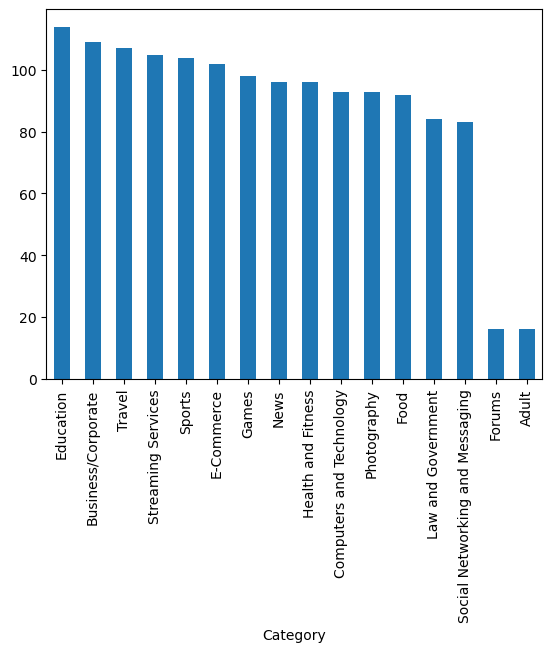

In [91]:
df.Category.value_counts().plot(kind='bar')

In [92]:
df = df.drop('Unnamed: 0', axis=1)
df.columns = df.columns.str.replace('-', '')
# df.columns = df.columns.str.replace(':', '')
df.columns

Index(['Unnamed 0', 'website_url', 'cleaned_website_text', 'Category'], dtype='object')

# Train

In [124]:
X = df.drop('Category', axis=1)
y = pd.DataFrame(df['Category'])

cat_cols = list(X.dtypes[X.dtypes == 'object'].keys())
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=0)

tf = TfidfVectorizer()
X_train_tfidf = tf.fit_transform(X_train['cleaned_website_text'])
X_valid_tfidf  = tf.transform(X_valid['cleaned_website_text'])


sample_row = X.iloc[0,:].to_dict()

In [117]:
wordpunct_tokenize('hello world')

['hello', 'world']

In [94]:
model = LGBMClassifier(n_estimators=500)
model.fit(X_train_tfidf, y_train)
# model.fit(X_train, y_train, categorical_feature=cat_cols)
preds = model.predict(X_valid_tfidf)

print(f'accuracy: {accuracy_score(y_valid, preds)}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 261
[LightGBM] [Info] Number of data points in the train set: 985, number of used features: 3
[LightGBM] [Info] Start training from score -4.407735
[LightGBM] [Info] Start training from score -2.658535
[LightGBM] [Info] Start training from score -2.658535
[LightGBM] [Info] Start training from score -2.561908
[LightGBM] [Info] Start training from score -2.548836
[LightGBM] [Info] Start training from score -2.832199
[LightGBM] [Info] Start training from score -4.494746
[LightGBM] [Info] Start training from score -2.615976
[LightGBM] [Info] Start training from score -2.575154
[LightGBM] [Info] Start training from score -2.765507
[LightGBM] [Info] Start training from score -2.815104
[LightGBM] [Info] Start training from sco

/opt/anaconda/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Adult'),
  Text(1, 0, 'Business/Corporate'),
  Text(2, 0, 'Computers and Technology'),
  Text(3, 0, 'E-Commerce'),
  Text(4, 0, 'Education'),
  Text(5, 0, 'Food'),
  Text(6, 0, 'Forums'),
  Text(7, 0, 'Games'),
  Text(8, 0, 'Health and Fitness'),
  Text(9, 0, 'Law and Government'),
  Text(10, 0, 'News'),
  Text(11, 0, 'Photography'),
  Text(12, 0, 'Social Networking and Messaging'),
  Text(13, 0, 'Sports'),
  Text(14, 0, 'Streaming Services'),
  Text(15, 0, 'Travel')])

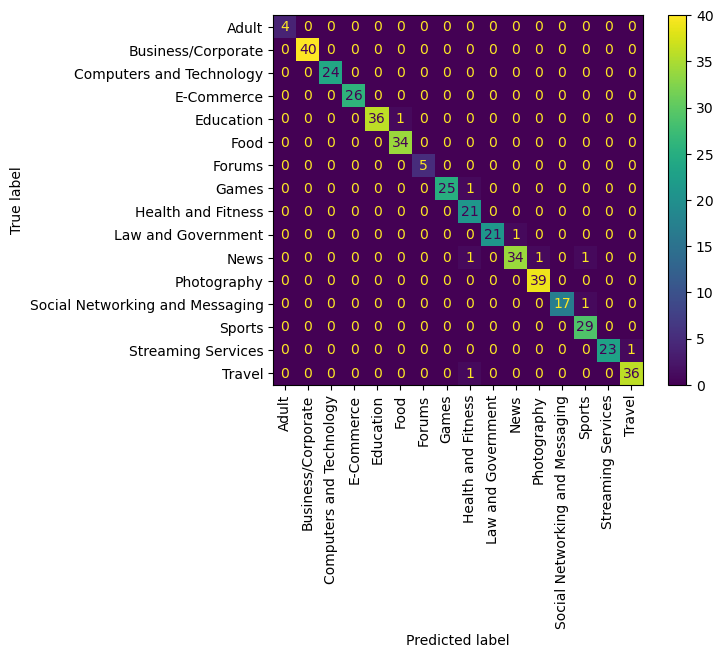

In [95]:
cm = confusion_matrix(y_valid, preds)
ConfusionMatrixDisplay(cm, display_labels=sorted(list(y_valid.Category.unique()))).plot()
plt.xticks(rotation=90)

In [96]:
from pydantic import BaseModel, ValidationError

class Website(BaseModel):
    website_url: object
    cleaned_website_text: object

print(sample_row)
website = Website(**sample_row)
inputs = pd.DataFrame([website.model_dump()])
pred = model.predict(inputs)[0]
pred

{'Unnamed 0': 0, 'website_url': 'https://www.booking.com/index.html?aid=1743217', 'cleaned_website_text': 'official site good hotel accommodation big saving hotel destination worldwide browse hotel review find guarantee good price hotel budget lodging accommodation hotel hotels special offer package special weekend break city break deal budget cheap discount saving select language find deal hotel home try search connect traveller india travel talk community recommend destination flamborough boreland colvend catfield harberton warleggan inspiration trip spot winter wildlife beautiful snowy island bye bye work want spontechnaity tech drive travel vital value maximise travel homes guest love browse property type hotels apartments resorts villa cabins cottage glamping serviced apartment holiday home guest house hostels motels ryokans riads holiday park homestays campsites country house farm stay boats luxury tent self catering accommodation tiny house chapel saint leonards wuqing wuchang s

ValueError: Number of features of the model must match the input. Model n_features_ is 3 and input n_features is 2